In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import time
import random
import pandas as pd

month = list()
title = list()
author = list()
publisher = list()
publish_date = list()
pages = list()
price = list()
category = list()
rating = list()

for year in range(0, 3): # 2020년부터 2022년까지

  for page in range(1, 13): # 1월부터 12월 매달 1일 베스트셀러

    if page<10:
      date = str(year) + '0' + str(page)
      url = 'http://book.interpark.com/display/collectlist.do?_method=BestsellerHourNew201605&searchDay=02{}01&bestTp=1&dispNo=028&clickCnb=Y&cltWeek='.format(date)
    else:
      date = str(year) + str(page)
      url = 'http://book.interpark.com/display/collectlist.do?_method=BestsellerHourNew201605&searchDay=02{}01&bestTp=1&dispNo=028&clickCnb=Y&cltWeek='.format(date)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    for book in soup.find_all('div', class_='listItem singleType'):
      output = book.find('a')
      href = str(output.attrs['href'])
      url2 = 'https://book.interpark.com' + href
      headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}
      response2 = requests.get(url2, headers=headers)
      soup2 = BeautifulSoup(response2.text, 'html.parser')

      try:
        title2 = soup2.find('div', class_='prod_title').find('div', class_= 'titleWrap').find('h2').text.split(':')[0] # 제목
        if title2[0] == ' ':
          title2 = title2[2:]
        title.append(title2)

        author2 = soup2.find('ul', class_= 'bInfo_txt').find_all('li')[0].text.split(': ')[1] # 작가
        author.append(author2)

        publisher2 = soup2.find('ul', class_= 'bInfo_txt').find_all('li')[-4].text.split(': ')[1] # 출판사
        publisher.append(publisher2)

        publish_date2 = soup2.find('ul', class_= 'bInfo_txt').find_all('li')[-3].text.split(': ')[1] # 출판일
        publish_date.append(publish_date2)

        pages2 = soup2.find('ul', class_= 'bInfo_txt').find_all('li')[-2].text.split(': ')[1] # 쪽수
        pages.append(pages2)

        price2 = soup2.find('span', class_= 'price').text.replace(',','') # 가격
        price.append(price2)

        category2 = soup2.find('ul', class_= 'classFiedList').find_all('li')[2].text # 분류
        category.append(category2)

        rating2 = soup2.find('div', class_= 'star_count').text # 평점
        rating.append(rating2)

        month2 = '202' + str(year) + '년' + str(page) + '월' # 월
        month.append(month2)      

        #time.sleep(random.uniform(2,4))  # 크롤링 차단 방지
        
      except:
        continue

dic = {'월': month, '이름': title, '작가': author, '출판사': publisher, '발행일': publish_date, '쪽수': pages, '정가': price, '분류': category, '평점': rating}
df = pd.DataFrame(dic)

In [10]:
df

,월,이름,작가,출판사,발행일,쪽수,정가,분류,평점
0,2020년1월,인간을 키우는 고양이,haha ha (원작),다독임북스,2020년 01월 08일,192,13500,시/에세이,9.7
1,2020년1월,꽃을 보듯 너를 본다,지혜,지혜,2020년 11월 30일,184,9000,시/에세이,9.6
2,2020년1월,흔한남매 3 [양장/초판],"흔한남매, 백난도",미래엔아이세움,2020년 01월 09일,168,10800,아동,9.9
3,2020년1월,"곰돌이 푸, 행복한 일은 매일 있어(포레스트 에디션)",곰돌이 푸,알에이치코리아,2022년 10월 14일,160,13320,시/에세이,9.5
4,2020년1월,에이트,이지성,차이정원,2019년 10월 21일,308,15300,자기계발,9.4
...,...,...,...,...,...,...,...,...,...
501,2022년12월,조국의 법고전 산책,조국,오마이북,2022년 11월 09일,468,19800,인문,9.5
502,2022년12월,2023 임용 면접레시피 기본서 [전면개정판],"류은진, 양왕경, 이광한, 이지혜",미래가치,2022년 10월 27일,600,33000,자격서/수험서,0.0
503,2022년12월,"출근길엔 니체, 퇴근길엔 장자",박주은,한국경제신문,2022년 11월 02일,260,14400,인문,10
504,2022년12월,내가 틀릴 수도 있습니다(화이트 에디션),비욘 나티코 린데블라드,다산초당,2022년 04월 18일,312,14400,인문,10


In [3]:
from collections import Counter

types = []
ratio = []
for key, value in Counter(df['분류']).most_common():
    print(key, value/len(df)*100)
    types.append(key)
    ratio.append(value/len(df)*100)

경제경영 25.296442687747035
소설 22.529644268774703
인문 10.67193675889328
시/에세이 9.881422924901186
자기계발 8.49802371541502
아동 7.114624505928854
가정과 생활 3.3596837944664033
사회과학 3.1620553359683794
국어/외국어/사전 2.1739130434782608
자격서/수험서 1.383399209486166
예술/대중문화 1.185770750988142
자연과 과학 0.9881422924901186
역사와 문화 0.7905138339920948
청소년 0.592885375494071
전공도서/대학교재 0.592885375494071
유아 0.3952569169960474
건강/뷰티 0.3952569169960474
만화/라이트노벨 0.3952569169960474
종교/역학 0.3952569169960474
외국도서 0.1976284584980237


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_

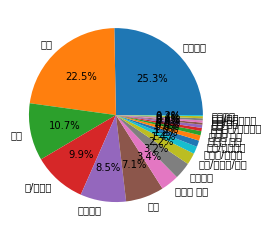

In [ ]:
import matplotlib.pyplot as plt

plt.pie(ratio, labels=types, autopct='%.1f%%')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       506 non-null    object
 1   이름      506 non-null    object
 2   작가      506 non-null    object
 3   출판사     506 non-null    object
 4   발행일     506 non-null    object
 5   쪽수      506 non-null    object
 6   정가      506 non-null    object
 7   분류      506 non-null    object
 8   평점      506 non-null    object
dtypes: object(9)
memory usage: 35.7+ KB


In [9]:
df.to_excel('after_covid.xlsx')